In [6]:
# Buscando os N zipcodes onde houveram o maior número de vendas
N = 15

df_sales    = pd.DataFrame(df['zipcode'].value_counts())
df_sales    = df_sales.nlargest(N,'zipcode')
zipcodes_sales = df_sales.index


<BarContainer object of 15 artists>

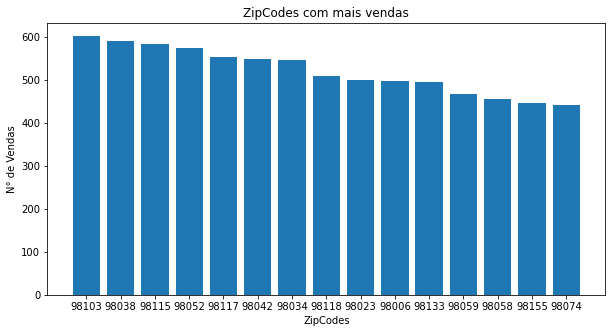

In [7]:
classes_grafico =[]
for i in zipcodes_sales:
    i =str(i)
    classes_grafico.append(i)

plt.figure(figsize=(10,5))
plt.xlabel('ZipCodes')
plt.ylabel('N° de Vendas')
plt.title('ZipCodes com mais vendas')
plt.bar(classes_grafico,df_sales['zipcode'])

In [132]:
# Buscando os N zipcodes onde o sqft_living é mais valorizado
zipcodes = df['zipcode'].unique()
sqft_living = []
sqft_price =[]
codes =[]

for i in zipcodes:
    data = df['price'][df['zipcode'] == i].sum()
    sqft_living = df['sqft_living'][df['zipcode'] == i].sum()
    k = (data/sqft_living)
    codes.append(i)
    sqft_price.append(k)

In [133]:
sqft_price = pd.DataFrame(sqft_price,columns =['Sqft_Price'])
codes = pd.DataFrame(codes,columns = ['ZipCodes'])

frame = [sqft_price,codes]
df_sqft = pd.concat(frame,axis=1).nlargest(N,'Sqft_Price').set_index('ZipCodes')
zipcodes_sqft = df_sqft.index

<BarContainer object of 15 artists>

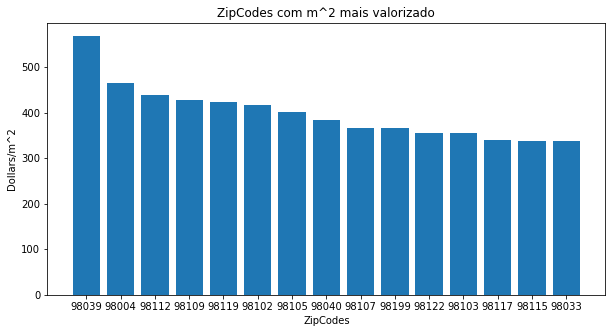

In [135]:
classes_grafico =[]
for i in zipcodes_sqft:
    i = str(i)
    classes_grafico.append(i)
    
plt.figure(figsize=(10,5))
plt.xlabel('ZipCodes')
plt.ylabel('Dollars/m^2')
plt.title('ZipCodes com m^2 mais valorizado')
plt.bar(classes_grafico,df_sqft['Sqft_Price'])
plt.show()

In [138]:
# Buscando as regiões de interseção entre as duas classficações levantadas
zipcodes_cruzados =[]

for i in range(N):
    if zipcodes_sales[i] in zipcodes_sqft:
        zipcodes_cruzados.append(zipcodes_sales[i])

total_sales =[]
sqft_prices = []

for i in zipcodes_cruzados:
    k =int(df_sales.loc[i])
    total_sales.append(k) 
    
    j =int(df_sqft.loc[i])
    sqft_prices.append(j) 

In [139]:
# Melhores Locais para se investir (Vende muito e bem valorizado)
total_sales = pd.DataFrame(total_sales,columns = ['Total Sales'])    
sqft_prices = pd.DataFrame(sqft_prices,columns =['Sqft_Price'])
zipcodes_cruzados = pd.DataFrame(zipcodes_cruzados,columns =['ZipCodes'])

frame = (zipcodes_cruzados,total_sales,sqft_prices)
df_gRegion = pd.concat(frame,axis =1)
print('Melhores Locais para se investir')
df_gRegion

Melhores Locais para se investir


,ZipCodes,Total Sales,Sqft_Price
0,98103,602,354
1,98115,583,337
2,98117,553,340


In [140]:
# Filtrando o dataset para apenas as regiões escolhidas
for i in df_gRegion['ZipCodes']:
    ndf = df[df['zipcode'] == i]
ndf   

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
32,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
33,7589200193,20141110T000000,535000.0,3,1.00,1090,3000,1.5,0,0,...,8,1090,0,1929,0,98117,47.6889,-122.375,1570,5080
52,7518505990,20141231T000000,600000.0,3,1.75,1410,4080,1.0,0,0,...,7,1000,410,1950,0,98117,47.6808,-122.384,1410,4080
53,3626039271,20150205T000000,585000.0,2,1.75,1980,8550,1.0,0,0,...,7,990,990,1981,0,98117,47.6989,-122.369,1480,6738
93,6021501535,20140725T000000,430000.0,3,1.50,1580,5000,1.0,0,0,...,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,6021503707,20150120T000000,352500.0,2,2.50,980,1010,3.0,0,0,...,8,980,0,2008,0,98117,47.6844,-122.387,980,1023
21538,1865400076,20140509T000000,324000.0,3,2.25,998,904,2.0,0,0,...,7,798,200,2007,0,98117,47.6983,-122.367,998,1110
21569,6021503705,20141015T000000,329000.0,2,2.50,980,1020,3.0,0,0,...,8,980,0,2008,0,98117,47.6844,-122.387,980,1023
21582,3052700432,20141112T000000,490000.0,3,2.25,1500,1290,2.0,0,0,...,8,1220,280,2006,0,98117,47.6785,-122.375,1460,1375


<BarContainer object of 7 artists>

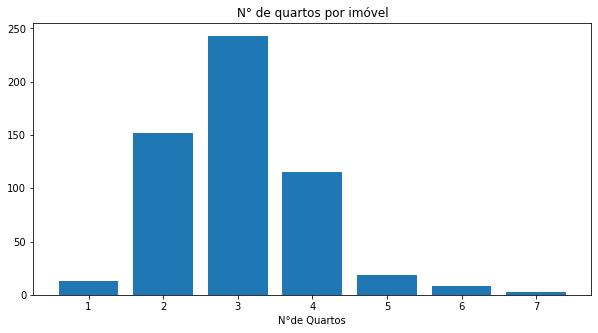

In [141]:
# Levantando o número de quartos dos imoveis
values = ndf['bedrooms'].value_counts().reset_index()
values =values.sort_values('index')

plt.figure(figsize=(10,5))
plt.title('N° de quartos por imóvel')
plt.xticks(range(10))
plt.xlabel('N°de Quartos')
plt.bar(values['index'],values['bedrooms'])


<BarContainer object of 13 artists>

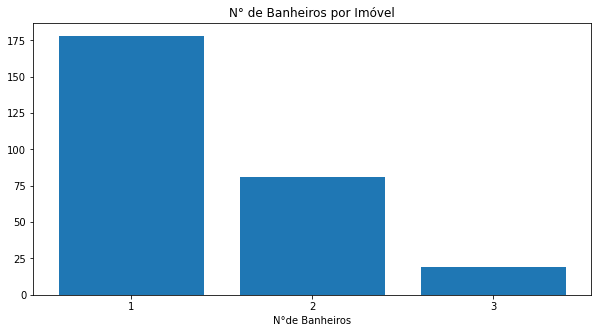

In [143]:
# Levantando o número de banheiros dos imoveis
values = ndf['bathrooms'].value_counts().reset_index()
values = values.sort_values('index')
clas = []

for i in values['index']:
    
    k = int(i)
    
    if k == 0:
        clas.append('1')
    else:
        clas.append(str(k))
      
plt.figure(figsize=(10,5))
plt.title('N° de Banheiros por Imóvel')
plt.xlabel('N°de Banheiros')
plt.bar(clas,values['bathrooms'])
plt.show()


<BarContainer object of 5 artists>

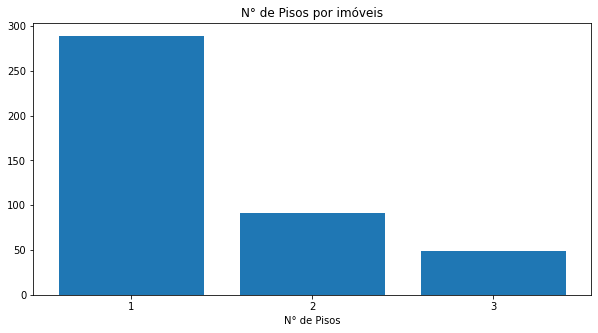

In [146]:
# Levantando o número de andares dos imoveis
values = ndf['floors'].value_counts().reset_index().sort_values('index')
clas = []
for i in values['index']:
    k = str(int(i))
    clas.append(k)
    
plt.figure(figsize=(10,5))
plt.title('N° de Pisos por imóveis')
plt.xlabel('N° de Pisos')
plt.bar(clas,values['floors'])

In [149]:
# Construindo um histograma dos valores de vendas dos imóveis
temp = pd.DataFrame(list(ndf['price'].values),columns =['Values'])
temp = temp.sort_values('Values',ascending = False)
df_temp = temp.reset_index()
valores =df_temp['Values']

clas = valores.index
nclas = []
for i in clas:
    i =str(i)
    nclas.append(i)

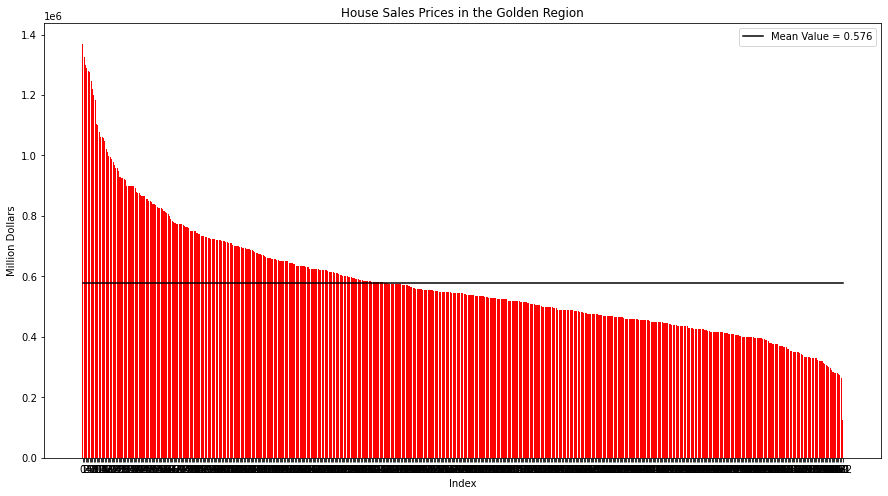

In [150]:
# Gerando o gráfico da média
df_mean = pd.DataFrame(range(553),columns=['clas'])
df_mean['Values'] = range(553)

for i in range(553):
    df_mean['Values'].loc[i] = valores.mean()


plt.figure(figsize=(15,8))
plt.title('House Sales Prices in the Golden Region')
plt.ylabel('Million Dollars')
plt.xlabel('Index')
plt.bar(nclas,valores,color = 'Red')
plt.plot(range(553),df_mean['Values'],color='Black',label='Valor Médio = 0.576')
plt.legend()
plt.show()